# Solutions to tutorial exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

**Exercise 02.1:**

541
0.01 9.9
0.10000000000000009


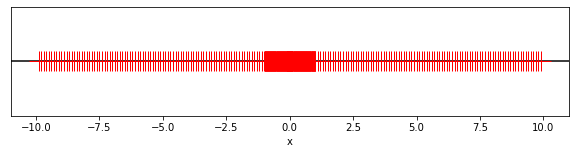

In [2]:
# 1.

print(2 * 9 * 10 * 3 + 1)

# 2.

print(1.0e-2, 9.9e0)

# 3.

print(1.1e0 - 1.0e0)

# 4.

d_1_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9]
d_2_vals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
E_vals = [0, -1, -2]

fig, ax = plt.subplots(figsize=(10, 2))
ax.axhline(0, color="black")

for E in E_vals:
    for d1 in d_1_vals:
        for d2 in d_2_vals:
            ax.plot(-(d1 + d2 * 0.1) * 10**E, 0.0, color="red", marker="+", markersize=20)
            ax.plot(+(d1 + d2 * 0.1) * 10**E, 0.0, color="red", marker="+", markersize=20)

ax.plot(0.0, 0.0, color="red", marker="+", markersize=20)

ax.set_yticks([])
ax.set_xlabel("x")
ax.set_xlim([-11, 11])
plt.show()

**Exercise 02.2:**

13
0.5 3.0
0.5


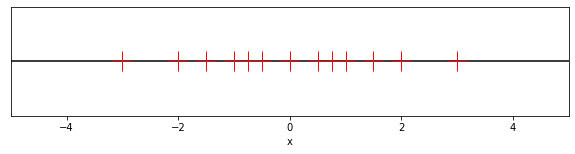

In [3]:
# 1.

print(2 * 1 * 2 * 3 + 1)

# 2.

print((1.0 * 1.0 + 0.0 * 0.5) * 2.0**(-1), (1.0 * 1.0 + 1.0 * 0.5) * 2.0**1)

# 3.

print((1.0 * 1.0 + 1.0 * 0.5) * 2.0**0 - (1.0 * 1.0 + 0.0 * 0.5) * 2.0**0)

# 4.

d_1_vals = [1]
d_2_vals = [0, 1]
E_vals = [1, 0, -1]

fig, ax = plt.subplots(figsize=(10, 2))
ax.axhline(0, color="black")

for E in E_vals:
    for d1 in d_1_vals:
        for d2 in d_2_vals:
            ax.plot(-(d1 + d2 * 0.5) * 2**E, 0.0, color="red", marker="+", markersize=20)
            ax.plot(+(d1 + d2 * 0.5) * 2**E, 0.0, color="red", marker="+", markersize=20)
            
ax.plot(0.0, 0.0, color="red", marker="+", markersize=20)

ax.set_yticks([])
ax.set_xlabel("x")
ax.set_xlim([-5, 5])
plt.show()

**Exercise 02.3:**

In [4]:
x = 0.1 + 0.2 - 0.3

for i in range(100):
    x = x + x
    
print(x)

70368744177664.0


**Exercise 02.4:**

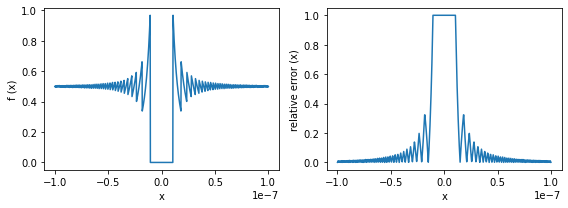

In [5]:
def function(x):
    return (1.0 - np.cos(x)) / x**2

def relative_error(x):
    return np.abs(0.5 - function(x)) / 0.5

x = np.linspace(-1.0e-7, 1.0e-7, 1000)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(x, function(x))
ax[0].set_xlabel("x")
ax[0].set_ylabel("f (x)")
ax[1].plot(x, relative_error(x))
ax[1].set_xlabel("x")
ax[1].set_ylabel("relative error (x)")
fig.tight_layout()
plt.show()

**Exercise 02.5:**

In [6]:
array = [0.9**n for n in range(0, 400)]

s_1 = 0.0
for x in array:
    s_1 += x

s_2 = 0.0
for x in array[::-1]:
    s_2 += x
    
print(s_1, s_2)

9.999999999999993 10.000000000000004


**Exercise 02.6:**

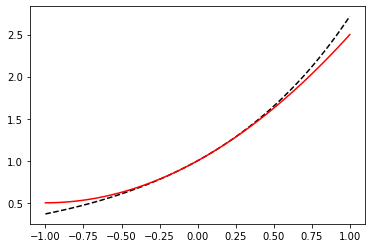

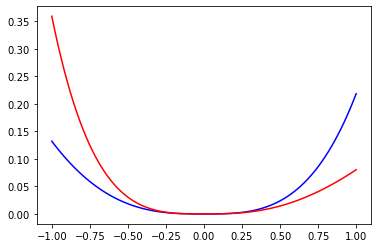

In [7]:
# 1.

x = np.linspace(-1, 1, 100)

def exp_taylor(x):
    return 1.0 + x + x**2 / 2.0

fig, ax = plt.subplots()
ax.plot(x, np.exp(x), color="black", linestyle="--")
ax.plot(x, exp_taylor(x), color="red")
plt.show()

# 2.

def absolute_error(x):
    return np.abs(np.exp(x) - exp_taylor(x))

def relative_error(x):
    return np.abs(np.exp(x) - exp_taylor(x)) / np.exp(x)

fig, ax = plt.subplots()
ax.plot(x, absolute_error(x), color="blue")
ax.plot(x, relative_error(x), color="red")
plt.show()

**Exercise 02.7:**

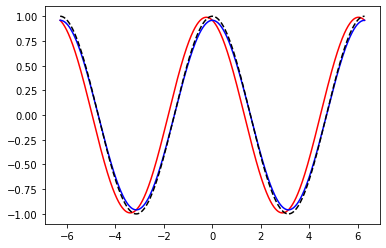

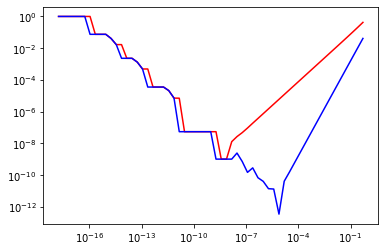

In [8]:
# 1.

def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2.0 * h)

x = np.linspace(-2.0 * np.pi, 2.0 * np.pi, 1000)
h = 0.5

fig, ax = plt.subplots()
ax.plot(x, forward_diff(np.sin, x, h), color="red")
ax.plot(x, central_diff(np.sin, x, h), color="blue")
ax.plot(x, np.cos(x), color="black", linestyle='--')
plt.show()

# 2.

def forward_error(f, x, h, exact_value):
    return np.abs(forward_diff(f, x, h) - exact_value) / np.abs(exact_value)

def central_error(f, x, h, exact_value):
    return np.abs(central_diff(f, x, h) - exact_value) / np.abs(exact_value)

x = 1.0
h = np.array([2.0**(-n) for n in range(1, 60)]);

fig, ax = plt.subplots()
ax.loglog(h, forward_error(np.sin, x, h, np.cos(x)), color="red")
ax.loglog(h, central_error(np.sin, x, h, np.cos(x)), color="blue")
plt.show()

**Exercise 02.8:**

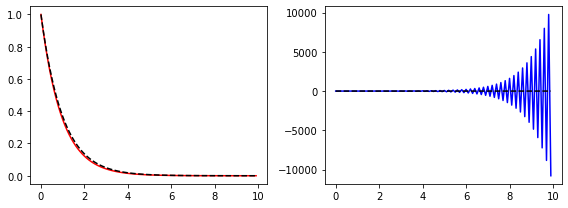

In [9]:
h = 0.1
x = np.arange(0, 10, h)
y_1 = np.zeros(x.size)
y_2 = np.zeros(x.size)

y_1[0] = 1.0
for i in range(x.size - 1):
    y_1[i+1] = y_1[i] - y_1[i] * h

y_2[0] = 1.0
for i in range(x.size - 1):
    y_2[i+1] = y_2[i-1] - y_2[i] * 2.0 * h

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(x, y_1, color="red")
ax[0].plot(x, np.exp(-x), color="black", linestyle="--")
ax[1].plot(x, y_2, color="blue")
ax[1].plot(x, np.exp(-x), color="black", linestyle="--")
fig.tight_layout()
plt.show()

**Exercise 02.9:**

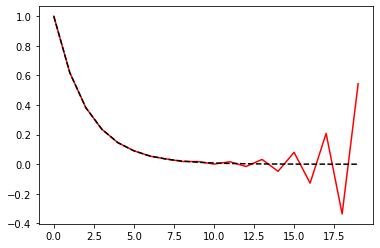

In [10]:
phi = np.zeros(20, dtype=np.float16)
phi[0] = 1.0
phi[1] = (np.sqrt(5.0) - 1.0) / 2.0
for n in range(1, 19):
    phi[n+1] = phi[n-1] - phi[n]
    
phi_exact = np.zeros(20, dtype=np.float16)
phi_exact[0] = 1.0
phi_exact[1] = (np.sqrt(5.0) - 1.0) / 2.0
for n in range(1, 19):
    phi_exact[n+1] = phi_exact[n] * phi_exact[1]
    
fig, ax = plt.subplots()
ax.plot(phi, linestyle="-", color="red")
ax.plot(phi_exact, linestyle="--", color="black")
plt.show()

**Exercise 02.10:**

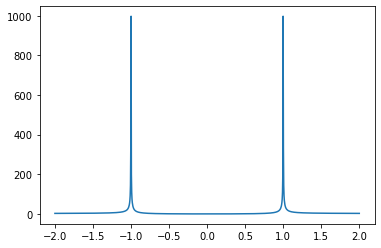

In [11]:
alpha = np.linspace(-2, 2, 1000)
C_p = 2.0 * alpha**2 / np.abs(1 - alpha**2)

fig, ax = plt.subplots()
ax.plot(alpha, C_p)
plt.show()

**Exercise 03.1:**

In [12]:
def scalar_product(x, y):
    """
    Calculates scalar product of two vectors.
    Args:
        x (array_like): Vector of size n
        y (array_like): Vector of size n
    Returns:
        numpy.float: Scalar product of x and y
    """
    n = x.size
    z = 0.0
    for i in range(n):
        z = z + x[i] * y[i]
    return z

**Exercise 03.2:**

In [13]:
def matrix_vector_product(A, x):
    """
    Calculates matrix-vector product.
    Args:
        A (array_like): A m-by-n matrix
        x (array_like): Vector of size n
    Returns:
        numpy.ndarray: Matrix-vector product
    """
    m, n = A.shape
    b = np.zeros(m)
    for i in range(m):
        for j in range(n):
            b[i] = b[i] + A[i, j] * x[j]
    return b

**Exercise 03.3:**

In [14]:
def matrix_matrix_product(A, B):
    """
    Calculates matrix-matrix product.
    Args:
        A (array_like): A m-by-n matrix
        B (array_like): A n-by-p matrix
    Returns:
        numpy.ndarray: Matrix-matrix product
    """
    m, n = A.shape
    n, p = B.shape
    C = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i, j] = C[i, j] + A[i, k] * B[k, j]
    return C

**Exercise 03.4:**

In [15]:
def forward_substitution(A, b):
    """
    Solves a system of linear equations with lower triangular matrix.
    Args:
        A (array_like): A n-by-n lower triangular matrix
        b (array_like): RHS vector of size n
    Returns:
        numpy.ndarray: Vector of solution
    """
    n, n = A.shape
    x = np.zeros(n)
    for i in range(n):
        x[i] = 1.0 / A[i, i] * (b[i] - A[i, :] @ x)
    return x

**Exercise 03.5:**

In [16]:
def backward_substitution(A, b):
    """
    Solves a system of linear equation with upper triangular matrix.
    Args:
        A (array_like): A n-by-n upper triangular matrix
        b (array_like): RHS vector of size n
    Returns:
        numpy.ndarray: Vector of solution
    """
    n, n = A.shape
    x = np.zeros(n)
    for i in reversed(range(n)):
            x[i] = 1.0 / A[i, i] * (b[i] - A[i, :] @ x)
    return x

**Exercise 03.6:**

In [17]:
def gaussian_elimination(A):
    """
    Transforms given matrix into an upper triangular form using the Gaussian elimination algorithm.
    Args:
        A (array_like): A n-by-n matrix
    Returns:
        numpy.ndarray: Upper triangular matrix
    """
    n, n = A.shape
    U = np.copy(A)
    for i in range(n):    
        for j in range(i + 1, n):
            for k in range(n):
                U[j, k] = U[j, k] - (U[j, i] / U[i, i]) * U[i, k]      
    return U

**Exercise 03.7:**

In [18]:
def gaussian_elimination_with_pivoting(A):
    """
    Transforms given matrix into an upper triangular form using the Gaussian elimination algorithm with pivoting.
    Args:
        A (array_like): A n-by-n matrix
    Returns:
        numpy.ndarray: Upper triangular matrix
    """
    n, n = A.shape
    U = np.copy(A)
    for i in range(n):
        max_row = np.argmax(np.abs(U[i:, i]))
        if (max_row != 0):
            row_i = np.copy(U[i, :])
            U[i, :] = U[i + max_row, :]
            U[i + max_row, :] = row_i   
        for j in range(i + 1, n):
            U[j, :] = U[j, :] - (U[j, i] / U[i, i]) * U[i, :]      
    return U

**Exercise 03.8:**

In [19]:
def gaussian_elimination_with_pivoting_vector(A, b):
    """
    Transforms given matrix into an upper triangular form using the Gaussian elimination algorithm with pivoting, 
    performs identical operations on RHS vector.
    Args:
        A (array_like): A n-by-n regular matrix
        b (array_like): RHS vector of size n
    Returns:
        numpy.ndarray: Upper triangular matrix
        numpy.ndarray: RHS vector corresponding to upper triangular matrix
    """
    n, n = A.shape
    U = np.zeros((n, n + 1))
    U[:, :-1] = A
    U[:, -1] = b
    for i in range(0, n):  
        max_row = np.argmax(np.abs(U[i:, i]))
        if (max_row != 0):
            row_i = np.copy(U[i, :])
            U[i, :] = U[i + max_row, :]
            U[i + max_row, :] = row_i            
        for j in range(i + 1, n):
            U[j, :] = U[j, :] - (U[j, i] / U[i, i]) * U[i, :]      
    return U[:, :-1], U[:, -1]

**Exercise 03.9:**

In [20]:
def lu_decomposition(A):
    """
    Factors given matrix as the product of a lower and an upper triangular matrix using LU decomposition.
    Args:
        A (array_like): A n-by-n matrix
    Returns:
        numpy.ndarray: Lower triangular matrix
        numpy.ndarray: Upper triangular matrix
    """
    n, n = A.shape
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            U[i, j] = A[i, j] - L[i, :] @ U[:, j]
            L[j, i] = 1.0 / U[i, i] * (A[j, i] - L[j, :] @ U[:, i])
    return L, U

**Exercise 03.10:**

In [21]:
def thomas_algorithm(A, b):
    """
    Solves system of linear equations with a tridiagonal matrix using Thomas algorithm.
    Args:
        A (array_like): A n-by-n regular matrix
        b (array_like): RHS vector of size n
    Returns:
        numpy.ndarray: Vector of solution
    """
    n, n = A.shape
    p = np.diag(A, 1)
    q = np.diag(A, 0)
    r = np.diag(A, -1)
    p = np.insert(p, n - 1, 0.0) 
    r = np.insert(r, 0, 0.0)
    x = np.zeros(n)
    mu  = np.zeros(n)
    rho = np.zeros(n)
    mu[0] = -p[0] / q[0]
    rho[0] = b[0] / q[0]
    for i in range(1, n):
        mu[i] = -p[i] / (r[i] * mu[i - 1] + q[i])
        rho[i] = (b[i] - r[i] * rho[i - 1]) / (r[i] * mu[i - 1] + q[i])
    x[n-1] = rho[n-1]
    for i in reversed(range(n - 1)):
        x[i] = mu[i] * x[i+1] + rho[i]
    return x

**Exercise 04.1:**

In [22]:
def jacobi_method(A, b, error_tolerance):
    """
    Solves system of linear equations iteratively using Jacobi's algorithm.
    Args:
        A (array_like): A n-by-n diagonally dominant matrix
        b (array_like): RHS vector of size n
        error_tolerance (float): Error tolerance
    Returns:
        numpy.ndarray: Vector of solution
    """
    n, n = A.shape
    x = np.zeros(n)
    x_new = np.zeros(n)
    k = 0
    while linalg.norm(np.dot(A, x) - b) > error_tolerance:
        for i in range(n):
            x_new[i] = (1.0 / A[i, i]) * (b[i] 
                - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i+1:], x[i+1:]))           
        x = x_new 
        k = k + 1
    print(k)
    return x

**Exercise 04.2:**

In [23]:
def gauss_seidel_method(A, b, error_tolerance):
    """
    Solves system of linear equations iteratively using Gauss-Seidel's algorithm.
    Args:
        A (array_like): A n-by-n diagonally dominant matrix
        b (array_like): RHS vector of size n
        error_tolerance (float): Error tolerance
    Returns:
        numpy.ndarray: Vector of solution
    """
    n, n = A.shape
    x = np.zeros(n)
    k = 0
    while linalg.norm(np.dot(A, x) - b) > error_tolerance:
        for i in range(n):
            x[i] = (1.0 / A[i, i]) * (b[i] 
                - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i+1:], x[i+1:]))     
        k = k + 1
    print(k)
    return x

**Exercise 04.3:**

In [24]:
def successive_overrelaxation_method(A, b, omega, error_tolerance):
    """
    Solves system of linear equations iteratively using successive over-relaxation (SOR) method.
    Args:
        A (array_like): A n-by-n matrix
        b (array_like): RHS vector of size n
        omega (float): Relaxation factor
        error_tolerance (float): Error tolerance
    Returns:
        numpy.ndarray: Vector of solution
    """
    n, n = A.shape
    x = np.zeros(n)
    k = 0
    while linalg.norm(np.dot(A, x) - b) > error_tolerance:
        for i in range(n):
            x[i] = (1.0 - omega) * x[i] +  (omega / A[i, i]) * (b[i] 
                - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i+1:], x[i+1:]))
        k = k + 1
    print(k)
    return x

**Exercise 04.4:**

In [25]:
A = np.random.rand(100, 100) + 10 * np.eye(100) # create diagonally dominant matrix to ensure convergence
b = np.random.rand(100)
x = jacobi_method(A, b, 1.0e-15)
x = gauss_seidel_method(A, b, 1.0e-15)
x = successive_overrelaxation_method(A, b, 0.7, 1.0e-15)

104
99
63


**Exercise 04.5:**

In [26]:
def conjugate_gradient_method(A, b, error_tolerance):
    """
    Solves system of linear equations using conjugate gradient method.
    Args:
        A (array_like): A n-by-n real, symmetric, and positive-definite matrix
        b (array_like): RHS vector of size n
        error_tolerance (float): Error tolerance
    Returns:
        numpy.ndarray: Vector of solution
    """
    n, n = A.shape
    x = np.zeros(n)
    r = b - A @ x
    p = r
    while True:
        alpha = (r.T @ r) / (p.T @ A @ p) 
        x = x + alpha * p
        r_new = r - alpha * A @ p 
        if linalg.norm(r_new) < error_tolerance:
            break          
        beta = (r_new.T @ r_new) / (r.T @ r)
        p = r_new + beta * p 
        r = r_new
    return x

**Exercise 04.6:**

In [27]:
def power_iteration(A, max_it):
    """
    Finds the greatest (in absolute value) eigen value of given matrix and its corresponding eigenvector.
    Args:
        A (array_like): A n-by-n diagonalizable matrix
        max_it (int): Maximum number of iterations
    Returns:
        numpy.ndarray: Eigenvector corresponding to a greatest eigenvalue (in absolute value)
        float: Greatest eigenvalue (in absolute value)
    """
    n, n = A.shape
    e_vec = np.random.rand(n)
    for i in range(max_it):
        e_vec_new = A @ e_vec
        e_vec = e_vec_new / linalg.norm(e_vec_new)
    e_val = linalg.norm(A @ e_vec)
    return e_vec, e_val

**Exercise 05.1:**

In [28]:
def linear_interpolation(x_p, y_p, x):
    """
    Calculates the linear interpolation.
    Args:
        x_p (array_like): X-coordinates of a set of datapoints
        y_p (array_like): Y-coordinates of a set of datapoints
        x (array_like): An array on which the interpolation is calculated
    Returns:
        numpy.ndarray: The linear interpolation
    """   
    sort = np.argsort(x_p)
    x_p = x_p[sort]
    y_p = y_p[sort]
    interp = np.zeros(x.size)
    for i in range(x_p.size - 1):
        interp += (y_p[i] + (y_p[i + 1] - y_p[i]) / (x_p[i + 1] - x_p[i]) * 
                   (x - x_p[i])) * (x >= x_p[i]) * (x <= x_p[i + 1])
    return interp

**Exercise 05.2:**

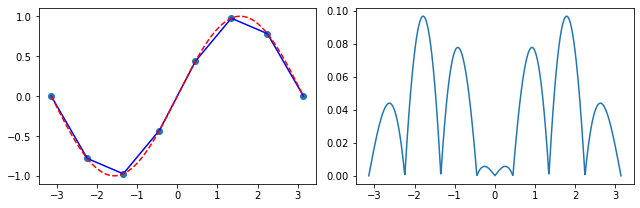

In [29]:
# create a set of 8 uniformly spaced points from [-pi, pi]
x_p = np.linspace(-np.pi, np.pi, 8)
y_p = np.sin(x_p)

# initialize an array on which the interpolation is evaluated
x = np.linspace(np.min(x_p), np.max(x_p), 1000)

# calculate the piece-wise linear interpolation
f = linear_interpolation(x_p, y_p, x)

# plot the results
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].scatter(x_p, y_p)
ax[0].plot(x, f, color="blue")
ax[0].plot(x, np.sin(x), color="red", linestyle="--")
ax[1].plot(x, np.abs(f - np.sin(x)))
fig.tight_layout()
plt.show()

**Exercise 05.3:**

In [30]:
def lagrange_interpolation(x, y):
    """
    Calculates a Lagrange interpolating polynomial.
    Args:
        x (array_like): X-coordinates of a set of datapoints
        y (array_like): Y-coordinates of a set of datapoints
    Returns:
        numpy.poly1d: The Lagrange interpolating polynomial
    """
    n = x.size
    L = np.poly1d(0)
    for i in range(n):
        F = np.poly1d(1)
        for j in range(n):
            if j != i:
                F *= np.poly1d([1., -x[j]]) / (x[i] - x[j])
        L += y[i] * F
    return L

**Exercise 05.4:**

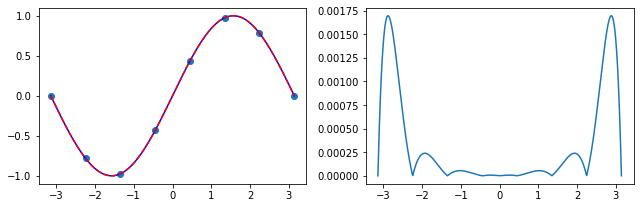

In [31]:
# create a set of 8 uniformly spaced points from [-pi, pi]
x_p = np.linspace(-np.pi, np.pi, 8)
y_p = np.sin(x_p)

# initialize an array on which the interpolation is evaluated
x = np.linspace(np.min(x_p), np.max(x_p), 1000)

# calculate the Lagnrange interpolating polynomial
f = lagrange_interpolation(x_p, y_p)

# plot the results
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].scatter(x_p, y_p)
ax[0].plot(x, f(x), color="blue")
ax[0].plot(x, np.sin(x), color="red", linestyle="--")
ax[1].plot(x, np.abs(f(x) - np.sin(x)))
fig.tight_layout()
plt.show()

**Exercise 05.5:**

In [32]:
def neville_algorithm(x, y):
    """
    Calculates a Lagrange interpolating polynomial using Neville's algorithm.
    Args:
        x (array_like): X-coordinates of a set of datapoints
        y (array_like): Y-coordinates of a set of datapoints
    Returns:
        numpy.poly1d: The Lagrange interpolating polynomial
    """
    n = x.size # get the size of data
    L = [[0 for _ in range(n)] for _ in range(n)] # initialize empty list of polynomials
    for i in range(n):      
        L[i][i] = np.poly1d(y[i])
    k = 1
    while k < n:
        for i in range(n - k):
            j = i + k
            L[i][j] = (np.poly1d([1., -x[j]]) * L[i][j-1] 
                       - np.poly1d([1., -x[i]]) * L[i+1][j]) / (x[i] - x[j]) 
        k = k + 1
    return L[0][n-1] # return Lagrange polynomial

**Exercise 05.6:**

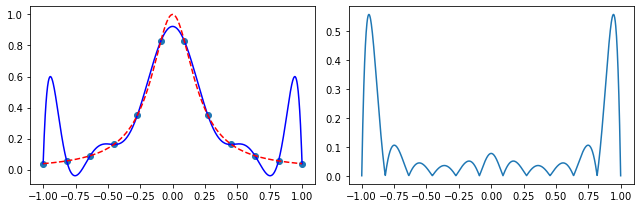

In [33]:
# define the Runge's function
def runge_function(x):
    return 1.0 / (1.0 + 25.0 * x**2)

# consider a set of points in which the function is evaluated
x_p = np.linspace(-1.0, 1.0, 12)
y_p = runge_function(x_p)

# initialize an array on which the interpolation is evaluated
x = np.linspace(np.min(x_p), np.max(x_p), 1000)

# find Lagrange interpolating polynomial
f = neville_algorithm(x_p, y_p)

# plot results
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].scatter(x_p, y_p)
ax[0].plot(x, f(x), color="blue")
ax[0].plot(x, runge_function(x), color="red", linestyle="--")
ax[1].plot(x, np.abs(f(x) - runge_function(x)))
fig.tight_layout()
plt.show()

**Exercise 05.7:**

In [34]:
def chebyshev_polynomial(n):
    """
    Calculates a Chebyshev polynomial of degree n using recursive formula.
    Args:
        n (int): Degree of the polynomial
    Returns:
        numpy.poly1d: The Chebyshev polynomial of degree n
    """
    T = [0 for i in range(n + 1)]
    for i in range(n + 1):
        if i == 0:
            T[i] = np.poly1d(1)
        elif i == 1:
            T[i] = np.poly1d([1, 0])
        else:
            T[i] = 2.0 * np.poly1d([1, 0]) * T[i-1] - T[i-2]
    return T[n]

**Exercise 05.8:**

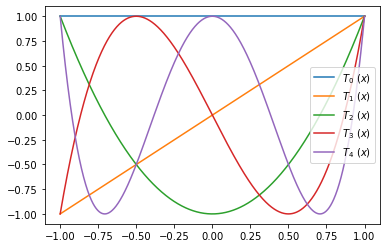

In [35]:
x = np.linspace(-1.0, 1.0, 1000)

# plot Chebyshev polynomials
fig, ax = plt.subplots()
for i in range(5):
    T = chebyshev_polynomial(i)
    ax.plot(x, T(x), label=r"$ T_{} \ (x) $".format(i))
ax.legend()
plt.show()

**Exercise 05.9:**

In [36]:
def chebyshev_roots(n):
    """
    Calculates roots of a Chebyshev polynomial of degree n.
    Args:
        n (int): Degree of the polynomial
    Returns:
        numpy.ndarray: Roots of a Chebyshev polynomial of degree n
    """
    roots = np.zeros(n)
    for k in range(n):
        roots[k] = -np.cos(np.pi * (k + 0.5) / n)
    return roots

**Exercise 05.10:**

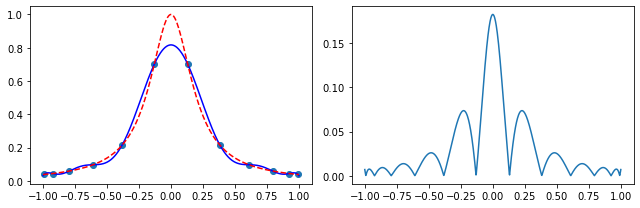

In [37]:
# define the Runge's function
def runge_function(x):
    return 1.0 / (1.0 + 25.0 * x**2)

# evaluate the Runge's function at roots of the 12-th degree Chebyshev polynomial
x_p = chebyshev_roots(12)
y_p = runge_function(x_p)

# initialize an array on which the interpolation is calculated
x = np.linspace(-1.0, 1.0, 1000)

# calculate the Lagrange interpolating polynomial
f = neville_algorithm(x_p, y_p)
    
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].scatter(x_p, y_p)
ax[0].plot(x, f(x), color="blue")
ax[0].plot(x, runge_function(x), color="red", linestyle="--")
ax[1].plot(x, np.abs(f(x) - runge_function(x)))
fig.tight_layout()
plt.show()

**Exercise 05.11:**

In [38]:
def polynomial_least_squares(x, y, n):
    """
    Calculates the n-th degree polynomial least squares approximation.
    Args:
        x (array_like): X-coordinates of a set of datapoints
        y (array_like): Y-coordinates of a set of datapoints
        n (int): degree of the approximating polynomial
    Returns:
        numpy.poly1d: The n-th degree polynomial least squares approximation
    """
    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)
    for i in range(n + 1):
        b[i] = np.sum(y * x**i)
        for j in range(n + 1):
            A[i, j] = np.sum(x**(i + j))
    beta = linalg.solve(A, b)
    return np.poly1d(beta[::-1])

**Exercise 05.12:**

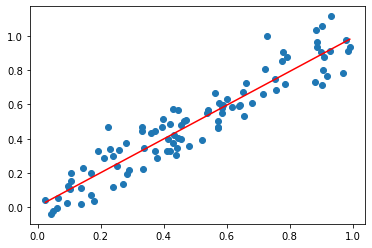

In [39]:
# consider data with Gaussian noise
x_p = np.random.rand(100)
y_p = x_p + 0.1 * np.random.normal(size=100)

# initialize an array on which the interpolation is evaluated
x = np.linspace(np.min(x_p), np.max(x_p), 100)

# find least squares interpolation
f = polynomial_least_squares(x_p, y_p, 1)

# plot results
fig, ax = plt.subplots()
ax.scatter(x_p, y_p) # plot the discrete data
ax.plot(x, f(x), color="red") # plot least squares interpolation 

**Exercise 05.13:**

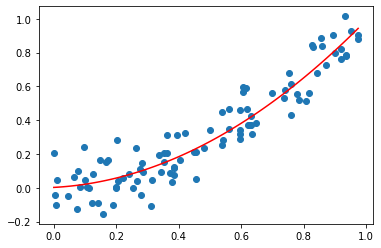

In [40]:
# consider data with Gaussian noise
x_p = np.random.rand(100)
y_p = x_p**2 + 0.1 * np.random.normal(size=100)

# initialize an array on which the interpolation is evaluated
x = np.linspace(np.min(x_p), np.max(x_p), 100)

# calculate the quadratic least squares interpolation
f = polynomial_least_squares(x_p, y_p, 2)

# plot the result
fig, ax = plt.subplots()
ax.scatter(x_p, y_p) # plot the discrete data
ax.plot(x, f(x), color="red") # plot least squares interpolation 

**Exercise 06.1:**

In [41]:
def bubble_sort(array):
    """
    Sorts the input data using bubble sort algorithm.
    Args:
        array (array_like): input data
    Returns:
        numpy.ndarray: sorted data
    """
    tmp = np.copy(array)
    for i in range(tmp.size):
        for j in range(tmp.size - i - 1):
            if tmp[j] > tmp[j + 1]:
                tmp[j], tmp[j + 1] = tmp[j + 1], tmp[j]
    return tmp

**Exercise 06.2:**

In [42]:
def selection_sort(array):
    """
    Sorts the input data using selection sort algorithm.
    Args:
        array (array_like): input data
    Returns:
        numpy.ndarray: sorted data
    """
    tmp = np.copy(array)
    for i in range(tmp.size):
        index_of_min = i
        for j in range(i, tmp.size):
            if tmp[j] < tmp[index_of_min]:
                index_of_min = j
        #index_of_min = i + np.argmin(tmp[i:])
        if index_of_min != i:
            tmp[i], tmp[index_of_min] = tmp[index_of_min], tmp[i] 
    return tmp

**Exercise 06.3:**

In [43]:
def insertion_sort(array):
    """
    Sorts the input data using inserion sort algorithm.
    Args:
        array (array_like): input data
    Returns:
        numpy.ndarray: sorted data
    """
    tmp = np.copy(array)
    for i in range(1, tmp.size):
        j = i
        val = tmp[i]
        while j > 0 and tmp[j - 1] > val:
            tmp[j] = tmp[j - 1]
            j = j - 1
        tmp[j] = val
    return tmp

**Exercise 06.4:**

In [44]:
def shell_sort(array):
    """
    Sorts the input data using shell sort algorithm.
    Args:
        array (array_like): input data
    Returns:
        numpy.ndarray: sorted data
    """
    tmp = np.copy(array)
    gap = int(tmp.size / 2)
    while gap > 0:
        for i in range(gap, tmp.size):
            val = tmp[i]
            j = i
            while j >= gap and tmp[j - gap] > val:
                tmp[j] = tmp[j - gap]
                j = j - gap
            tmp[j] = val
        gap = int(gap / 2)
    return tmp

**Exercise 06.5:**

In [45]:
def quick_sort(array):
    """
    Sorts the input data using quicksort algorithm.
    Args:
        array (array_like): input data
    Returns:
        numpy.ndarray: sorted data
    """
    less = np.array([])
    equal = np.array([])
    greater = np.array([])
    if array.size > 1:
        pivot = array[0]
        for x in array:
            if x < pivot: less = np.append(less, x)
            if x == pivot: equal = np.append(equal, x)
            if x > pivot: greater = np.append(greater, x)
        return np.concatenate((quick_sort(less), equal, quick_sort(greater)))
    else:
        return array

**Exercise 06.6:**

In [46]:
def heap_sort(array):
    """
    Sorts the input data using heap sort algorithm.
    Args:
        array (array_like): input data
    Returns:
        numpy.ndarray: sorted data
    """
    def heapify(array, size, parent_index): 
        index_of_largest = parent_index
        left_child_index = 2 * parent_index + 1  
        right_child_index = 2 * parent_index + 2
        if left_child_index < size and array[left_child_index] > array[index_of_largest]: 
            index_of_largest = left_child_index 
        if right_child_index < size and array[right_child_index] > array[index_of_largest]: 
            index_of_largest = right_child_index
        if index_of_largest != parent_index: 
            array[index_of_largest], array[parent_index] = array[parent_index], array[index_of_largest]
            heapify(array, size, index_of_largest)  
    tmp = np.copy(array)
    for i in reversed(range(int(tmp.size / 2))): 
        heapify(tmp, tmp.size, i) 
    for i in reversed(range(1, tmp.size)): 
        tmp[i], tmp[0] = tmp[0], tmp[i]
        heapify(tmp, i, 0)         
    return tmp

**Exercise 06.7:**

bubble sort:
39.4 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
selection sort:
30.3 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
insertion sort:
22.2 µs ± 2.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
shell sort:
23.5 µs ± 2.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
quicksort:
348 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
heapsort:
51.2 µs ± 3.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
bubble sort:
3.93 ms ± 329 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
selection sort:
2.17 ms ± 289 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
insertion sort:
1.31 ms ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
shell sort:
456 µs ± 7.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
quicksort:
5.37 ms ± 30.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
heapsort:
844 µs ± 15.1 µs per loop (mean ± std. dev. 

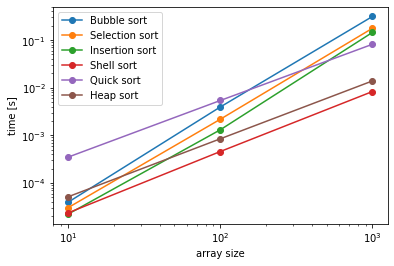

In [47]:
sizes = [10**i for i in range(1, 4)]

bubblesort_times = []
selectionsort_times = []
insertionsort_times = []
shellsort_times = []
quicksort_times = []
heapsort_times = []
for i in sizes:
    random_array = np.random.rand(i)
    print("bubble sort:")
    time = %timeit -o bubble_sort(random_array)
    bubblesort_times.append(time.average)
    print("selection sort:")
    time = %timeit -o selection_sort(random_array)
    selectionsort_times.append(time.average)
    print("insertion sort:")
    time = %timeit -o insertion_sort(random_array)
    insertionsort_times.append(time.average)
    print("shell sort:")
    time = %timeit -o shell_sort(random_array)
    shellsort_times.append(time.average)
    print("quicksort:")
    time = %timeit -o quick_sort(random_array)
    quicksort_times.append(time.average)
    print("heapsort:")
    time = %timeit -o heap_sort(random_array)
    heapsort_times.append(time.average)

fig, ax = plt.subplots()
ax.loglog(sizes, bubblesort_times, label="Bubble sort", marker="o")
ax.loglog(sizes, selectionsort_times, label="Selection sort", marker="o")
ax.loglog(sizes, insertionsort_times, label="Insertion sort", marker="o")
ax.loglog(sizes, shellsort_times, label="Shell sort", marker="o")
ax.loglog(sizes, quicksort_times, label="Quick sort", marker="o")
ax.loglog(sizes, heapsort_times, label="Heap sort", marker="o")
ax.set_xlabel('array size')
ax.set_ylabel('time [s]')
ax.legend()
plt.show()